In [74]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
plt.rcParams.update({'font.family':'serif'})

Модель нейрона Ижикевича:

$$
\frac{d V}{d t} = 0.04 V^2 + 5V + 140 - u + I
$$

$$
\frac{d u}{dt} = a(bV - u)
$$


Конечно разностная схема:

$$
V_{i+1} = (0.04 V_i^2 + 5V_i + 140 - u_i + I) \Delta t + V_{i}
$$

$$
u_{i+1} = a(bV_i - u_i) \Delta t + u_i
$$

Начальные условия:

$$
V_0 = c, u = 0
$$


(25.0, 180.0)

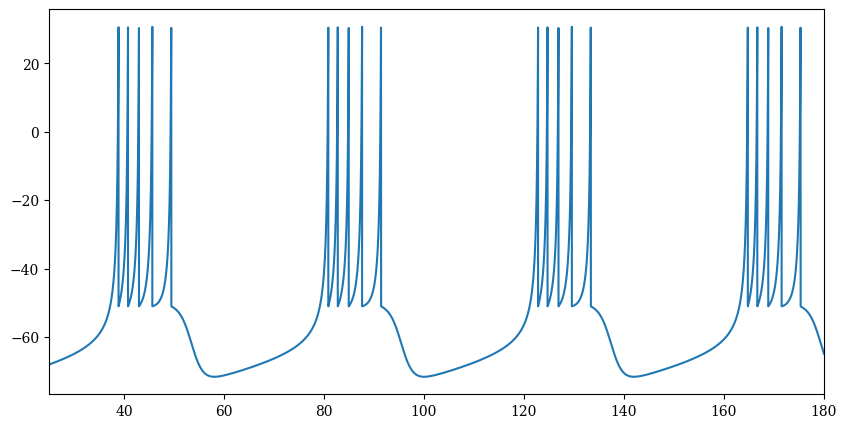

In [75]:
a = 0.02
b = 0.2
c = -51
d = 2
I = 15

V_start = [c]
u_start = [0]

t = np.linspace(0, 200, 100000)
delta_t = t[1] - t[0]
for i in range(len(t) - 1):
    if V_start[i] >= 30:
        V_start.append(c)
        u_start.append(u_start[i] + d)
    else:
        V_start.append((0.04 * V_start[i] ** 2 + 5 * V_start[i] + 140 - u_start[i] + I)* delta_t + V_start[i])
        u_start.append(a * (b * V_start[i] - u_start[i]) * delta_t + u_start[i])

fig, ax = plt.subplots(figsize = [10,5])
ax.plot(t, V_start)
ax.set_xlim([25,180])
#ax.set_ylim([-80,50])

In [76]:
import numpy as np

class Izhikevich():
    a: float  = 0.02
    b: float = 0.2
    c: float  = -65
    d: float = 2
    I: float = 15
    v_init: float = c
    u_init: float = 0

    def __init__(self, a = a, b = b, c = c, d = d, I = I) -> None:
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        self.a = a
        self.I = I
    
    def initial_conditions(self, v_init = v_init, u_init = u_init):
        self.v_init = v_init
        self.u_init = u_init

    def calculate(self, time_interval: float = 100, dots: int = 100000):
        self.v: list = [self.v_init]
        self.u: list = [self.u_init]
        time_array = np.linspace(0, time_interval, dots)
        delta_t = time_array[1] - time_array[0]
        for i in range(dots - 1):
            if self.v[i] >= 30:
                self.v.append(self.c)
                self.u.append(self.u[i] + self.d)
            else:
                self.v.append((0.04 * self.v[i] ** 2 + 5 * self.v[i] + 140 - self.u[i] + self.I) * delta_t + self.v[i])
                self.u.append(self.a * (self.b * self.v[i] - self.u[i]) * delta_t + self.u[i])
        return time_array, self.v, self.u

In [119]:
i_1 = Izhikevich()
t_1, v_1, _ = i_1.calculate(time_interval=100)

i_2 = Izhikevich(a=0.1)
t_2, v_2, _ = i_2.calculate(time_interval=100)

i_3 = Izhikevich(c=-50, d=2)
t_3, v_3, _ = i_3.calculate(time_interval=100)


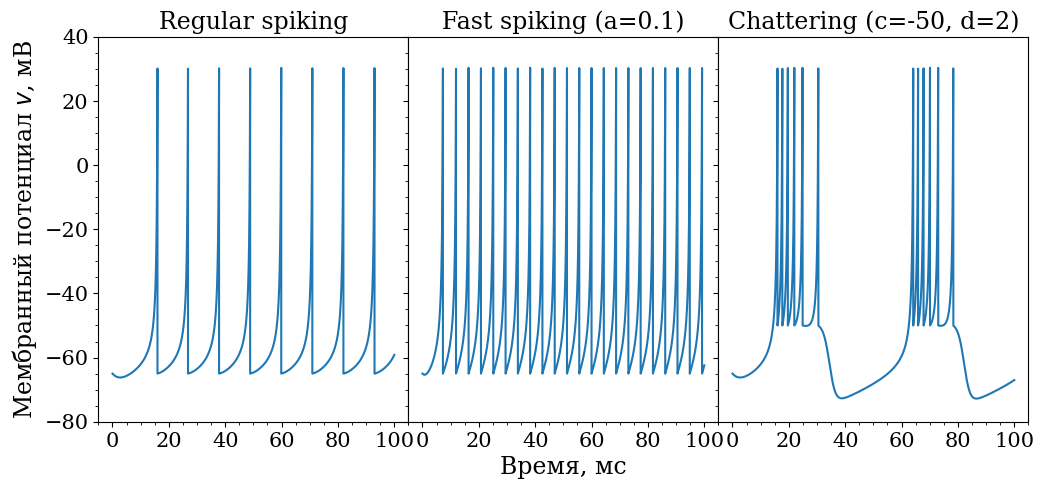

In [138]:
fig = plt.figure(figsize=(12, 5))
gs = GridSpec(ncols=3, nrows=1, figure=fig)

ax_1 = fig.add_subplot(gs[0])
ax_1.plot(t_1, v_1)
ax_1.tick_params(labelsize=15)
ax_1.set(xlim=[-5,105], ylim=[-80,40])
ax_1.set_title('Regular spiking', size = 17)
ax_1.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax_1.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax_1.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax_1.yaxis.set_minor_locator(ticker.MultipleLocator(5))
ax_1.set_ylabel(r'Мембранный потенциал $v$, мВ', size = 17)

ax_2 = fig.add_subplot(gs[1])
ax_2.plot(t_2, v_2)
ax_2.tick_params(labelsize=15, labelleft = False)
ax_2.set(xlim=[-5,105], ylim=[-80,40])
ax_2.set_title('Fast spiking (a=0.1)', size = 17)
ax_2.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax_2.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax_2.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax_2.yaxis.set_minor_locator(ticker.MultipleLocator(5))
ax_2.set_xlabel('Время, мс', size = 17)

ax_3 = fig.add_subplot(gs[2])
ax_3.plot(t_3, v_3)
ax_3.tick_params(labelsize=15, labelleft = False)
ax_3.set(xlim=[-5,105], ylim=[-80,40])
ax_3.set_title('Chattering (c=-50, d=2)', size = 17)
ax_3.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax_3.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax_3.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax_3.yaxis.set_minor_locator(ticker.MultipleLocator(5))


gs.update(wspace=0, hspace = 0)

#plt.savefig('Izhikevich_model.png', dpi = 300, bbox_inches = 'tight')

In [121]:
'''fig = plt.figure(figsize=(6, 9), constrained_layout=True)
#fig.tight_layout(pad=1)
gs = GridSpec(ncols=1, nrows=3, figure=fig)

x, y, z = t[10000:50000], V_start[10000:50000], u_start[10000:50000]

ax_1 = fig.add_subplot(gs[0, 0])
ax_1.plot(x, y, linestyle = 'dashed', linewidth = 0.5, zorder = 1, color = 'gray')
ax_1.set_ylabel(r'Membrane potential V, $mV$')
ax_1.set_xlabel(r'Time, $ms$')
ax_1.set(xlim=[20, 100], ylim=[-80,40])
ax_1.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax_1.xaxis.set_minor_locator(ticker.MultipleLocator(2.5))
ax_1.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax_1.yaxis.set_minor_locator(ticker.MultipleLocator(5))

v = np.linspace(-80, 40, 100)
u = np.linspace(-10, 10, 100)
V, U = np.meshgrid(v, u)
derivarive_v = 0.04 * V ** 2 + 5 * V + 140 - U + I
derivarive_u = a * (b * V - U)

ax_2 = fig.add_subplot(gs[1:, 0])
ax_2.streamplot(V, U, derivarive_v, derivarive_u, linewidth = 1, density = 2, arrowsize = 0.5, zorder = 1)
ax_2.set_xlabel(r'Membrane potential V, $mV$')
ax_2.set_ylabel(r'Membrane recovery variable u, $mV$')
ax_2.set(ylim=[-10, 10], xlim=[-80,40])
ax_2.yaxis.set_major_locator(ticker.MultipleLocator(2.5))
ax_2.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax_2.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax_2.xaxis.set_minor_locator(ticker.MultipleLocator(5))

line, = ax_1.plot([],[], color = 'r', zorder = 2, linewidth = 3)
line_1, = ax_2.plot([],[], color = 'r', zorder = 2, linewidth = 3)

def update(frame):
    line.set_data(x[100 * frame:100 * frame + 1000],y[100 * frame:100 * frame + 1000])
    line_1.set_data(y[100 * frame:100 * frame + 1000],z[100 * frame :100 * frame + 1000])
    return None


 
anim = FuncAnimation(fig, update, frames=400, interval=50)
anim.save('sine_wave.gif', writer='imagemagick')'''

"fig = plt.figure(figsize=(6, 9), constrained_layout=True)\n#fig.tight_layout(pad=1)\ngs = GridSpec(ncols=1, nrows=3, figure=fig)\n\nx, y, z = t[10000:50000], V_start[10000:50000], u_start[10000:50000]\n\nax_1 = fig.add_subplot(gs[0, 0])\nax_1.plot(x, y, linestyle = 'dashed', linewidth = 0.5, zorder = 1, color = 'gray')\nax_1.set_ylabel(r'Membrane potential V, $mV$')\nax_1.set_xlabel(r'Time, $ms$')\nax_1.set(xlim=[20, 100], ylim=[-80,40])\nax_1.xaxis.set_major_locator(ticker.MultipleLocator(10))\nax_1.xaxis.set_minor_locator(ticker.MultipleLocator(2.5))\nax_1.yaxis.set_major_locator(ticker.MultipleLocator(20))\nax_1.yaxis.set_minor_locator(ticker.MultipleLocator(5))\n\nv = np.linspace(-80, 40, 100)\nu = np.linspace(-10, 10, 100)\nV, U = np.meshgrid(v, u)\nderivarive_v = 0.04 * V ** 2 + 5 * V + 140 - U + I\nderivarive_u = a * (b * V - U)\n\nax_2 = fig.add_subplot(gs[1:, 0])\nax_2.streamplot(V, U, derivarive_v, derivarive_u, linewidth = 1, density = 2, arrowsize = 0.5, zorder = 1)\nax_2.

In [122]:
'''v = np.linspace(-100, -20, 100)
u = np.linspace(-5, 15, 100)
x = np.linspace(-100,-20, 100)
y = 0.04 * x ** 2 + 5 * x + 140 + I

V, U = np.meshgrid(v, u)
derivarive_v = 0.04 * V ** 2 + 5 * V + 140 - U + I
derivarive_u = a * (b * V - U)

fig, ax = plt.subplots(figsize = [8,8])
ax.streamplot(V,u, derivarive_v, derivarive_u, density = 2, arrowsize = 0.7)
#ax.plot(x, y)
ax.set_xlabel('v', size = 20)
ax.set_ylabel('u', size = 20)
ax.set(xlim=[-100, -20], ylim=[-5,15])
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(2.5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2.5))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax.tick_params(labelsize=15)'''

#plt.savefig('phase.png', dpi = 300, bbox_inches = 'tight')


"v = np.linspace(-100, -20, 100)\nu = np.linspace(-5, 15, 100)\nx = np.linspace(-100,-20, 100)\ny = 0.04 * x ** 2 + 5 * x + 140 + I\n\nV, U = np.meshgrid(v, u)\nderivarive_v = 0.04 * V ** 2 + 5 * V + 140 - U + I\nderivarive_u = a * (b * V - U)\n\nfig, ax = plt.subplots(figsize = [8,8])\nax.streamplot(V,u, derivarive_v, derivarive_u, density = 2, arrowsize = 0.7)\n#ax.plot(x, y)\nax.set_xlabel('v', size = 20)\nax.set_ylabel('u', size = 20)\nax.set(xlim=[-100, -20], ylim=[-5,15])\nax.xaxis.set_major_locator(ticker.MultipleLocator(10))\nax.xaxis.set_minor_locator(ticker.MultipleLocator(2.5))\nax.yaxis.set_major_locator(ticker.MultipleLocator(2.5))\nax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))\nax.tick_params(labelsize=15)"